## Data Science and Business Analytics Internship - Veena Valambur
### Graduate Rotational Internship Program @ The Sparks Foundation

## Task 1: Prediction using Supervised Machine Learning

### Simple Linear Regression

### Objective
- To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
- What will be the predicted score if a student studies for 9.25 hours/day?

### Data Description
- The dataset contains the number of hours of study and the percentage of marks scored by a student in exams.

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Reading the dataset

In [2]:
data = pd.read_csv('student_scores.csv')

### Data Overview

#### Reading the first five rows of the data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking the number of rows and columns

In [4]:
data.shape

(25, 2)

#### Observations:
- The dataset contains 25 rows and 2 columns

#### Checking column datatypes and number of non-null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Observations:
- The dataset contains 2 variables - Hours and Scores
- The variable Hours is of float datatype and Scores is of int data type
- Both of the variables contain 25 non null values

#### Get the statistical summary of the dataset

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Observations:
- The percentage of marks scored lies in the range 17 to 95 with a median of 47 while the mean is 51.48
- Number of hours studied varies from 1.1 to 9.2; Median and Mean is not varying much in this case as well with only a difference of around 0.2

#### Checking for missing values in the data

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Observations:

- There are no missing values in the data

### Exploratory Data Analysis
- Before we further process the data, let's take a look at the graphical visualization of the data to understand it in a better way.

#### Distribution of number of Hours of study

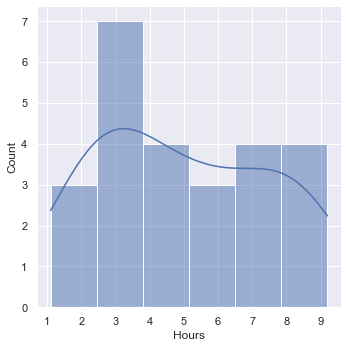

In [8]:
sns.displot(data["Hours"],kde=True)

#### Observations:
- The number of students who study for 2.5 to 4 hours is the highest

#### Distribution of the scores

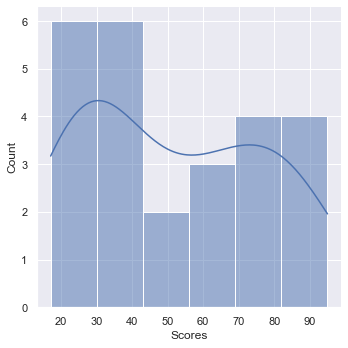

In [9]:
sns.displot(data["Scores"],kde=True)

#### Observations:
- Majority of the students scored in the range of 20-40

#### Relationship between Marks Scored and Study Hours

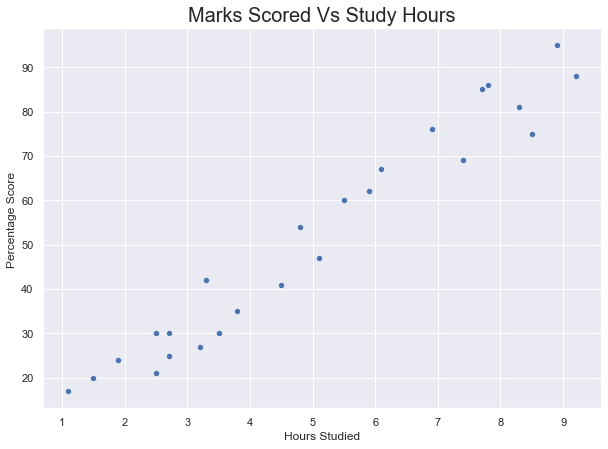

In [10]:
#PLotting the relationship
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
sns.scatterplot(x="Hours", y="Scores",data=data)
plt.title('Marks Scored Vs Study Hours',size=20)
plt.ylabel('Percentage Score ', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Observations:
- From the graph, it is clear that there is a positive linear relationship between Hours of study and the percentage of scores.
- A student who study for the maximum number of hours scores the most.

#### Correlation between the variables

In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


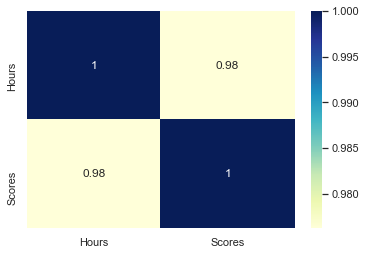

In [12]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

#### Observations:
- There is a strong positive correlation between the two variables.

### Building a Linear Regression model
- We want to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check it's performance.

#### Defining X and y variables

In [13]:
X = data.drop("Scores", axis=1)
y = data["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


#### Splitting the data in 70:30 ratio for train to test data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 17
Number of rows in test data = 8


#### Building Linear Regression Model

In [16]:
# Fitting the linear regression model on the train data (70% of the whole data)
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)
print("Model has been trained Successfully.")

Model has been trained Successfully.


#### Let's check the coefficients and intercept of the model.

In [17]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Hours,9.710541
Intercept,2.794197


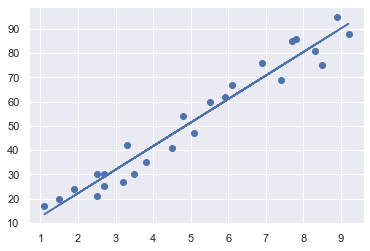

In [18]:
# Plotting the regression line
line = linearregression.coef_*X+linearregression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Let us now make predictions on the test set (X_test) with the model, and compare the actual output values with the predicted values.

In [19]:
# predictions on the test set
pred = linearregression.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.head(10)

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


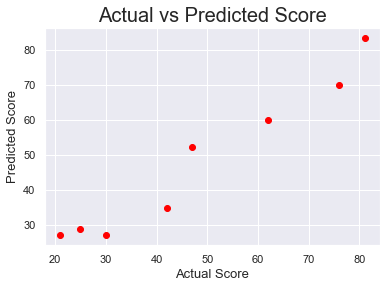

In [20]:
plt.scatter(x=y_test, y=pred, color='red')
plt.title('Actual vs Predicted Score', size=20)
plt.ylabel('Predicted Score', size=13)
plt.xlabel('Actual Score', size=13)
plt.show()

#### Observations:
- We can observe here that our model has returned good prediction results, and the actual and predicted values are comparable.

#### Evaluating the Model

In [21]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))

Mean absolute error:  4.499999999999998
Mean squared error:  23.61945761415174


In [22]:
# You can also test with your own data
hours = [10.2]
linearregression.predict([hours])


array([101.84171423])

#### Predicted score of a student who studies for 9.25 hrs/day

In [23]:
hours = [9.25]
answer = linearregression.predict([hours])
print("Score of a student who has studied for 9.25 hours a day is:= {}".format(round(answer[0],3)))

Score of a student who has studied for 9.25 hours a day is:= 92.617
